In [78]:
import nltk
from nltk.corpus import movie_reviews
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
from afinn import Afinn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve, PrecisionRecallDisplay, ConfusionMatrixDisplay
from konlpy.tag import Okt

In [2]:
movie_reviews.fileids()[:10]

['neg/cv000_29416.txt',
 'neg/cv001_19502.txt',
 'neg/cv002_17424.txt',
 'neg/cv003_12683.txt',
 'neg/cv004_12641.txt',
 'neg/cv005_29357.txt',
 'neg/cv006_17022.txt',
 'neg/cv007_4992.txt',
 'neg/cv008_29326.txt',
 'neg/cv009_29417.txt']

In [3]:
movie_reviews.categories()

['neg', 'pos']

In [4]:
print(len(movie_reviews.fileids(categories='neg')), len(movie_reviews.fileids(categories='pos')))

1000 1000


In [5]:
fileids = movie_reviews.fileids()
reviews = [movie_reviews.raw(fileid) for fileid in fileids]
categories = [movie_reviews.categories(fileid)[0] for fileid in fileids]

In [6]:
np.unique(categories, return_counts=True)

(array(['neg', 'pos'], dtype='<U3'), array([1000, 1000], dtype=int64))

In [7]:
result = TextBlob(reviews[0])
result.sentiment

Sentiment(polarity=0.06479782948532947, subjectivity=0.5188408350908352)

In [8]:
result.words

WordList(['plot', 'two', 'teen', 'couples', 'go', 'to', 'a', 'church', 'party', 'drink', 'and', 'then', 'drive', 'they', 'get', 'into', 'an', 'accident', 'one', 'of', 'the', 'guys', 'dies', 'but', 'his', 'girlfriend', 'continues', 'to', 'see', 'him', 'in', 'her', 'life', 'and', 'has', 'nightmares', 'what', "'s", 'the', 'deal', 'watch', 'the', 'movie', 'and', 'sorta', 'find', 'out', 'critique', 'a', 'mind-fuck', 'movie', 'for', 'the', 'teen', 'generation', 'that', 'touches', 'on', 'a', 'very', 'cool', 'idea', 'but', 'presents', 'it', 'in', 'a', 'very', 'bad', 'package', 'which', 'is', 'what', 'makes', 'this', 'review', 'an', 'even', 'harder', 'one', 'to', 'write', 'since', 'i', 'generally', 'applaud', 'films', 'which', 'attempt', 'to', 'break', 'the', 'mold', 'mess', 'with', 'your', 'head', 'and', 'such', 'lost', 'highway', 'memento', 'but', 'there', 'are', 'good', 'and', 'bad', 'ways', 'of', 'making', 'all', 'types', 'of', 'films', 'and', 'these', 'folks', 'just', 'did', "n't", 'snag',

In [9]:
def sentiment_TextBlob(docs):
    results = []
    for doc in docs:
        testimonial = TextBlob(doc)
        if testimonial.sentiment.polarity > 0:
            results.append('pos')
        else:
            results.append('neg')
    
    return results

In [10]:
accuracy_score(categories, sentiment_TextBlob(reviews))

0.6

In [11]:
def sentiment_Afinn(docs):
    afn = Afinn(emoticons=True)
    results = []

    for doc in docs:
        if afn.score(doc) > 0:
            results.append('pos')
        else:
            results.append('neg')
    return results

In [12]:
accuracy_score(categories, sentiment_Afinn(reviews))

0.664

In [15]:
X_train, X_test, y_train, y_test = train_test_split(reviews, categories, test_size=0.2, random_state=7)

In [17]:
tfidf = TfidfVectorizer()
X_train_tf = tfidf.fit_transform(X_train)
X_test_tf = tfidf.transform(X_test)

In [18]:
nb_clf = MultinomialNB(alpha=0.01).fit(X_train_tf, y_train)

In [19]:
nb_clf.score(X_train_tf, y_train), nb_clf.score(X_test_tf, y_test)

(0.998125, 0.7975)

In [22]:
df = pd.read_csv('./data/daum_movie_review.csv')
df.head()

,review,rating,date,title
0,돈 들인건 티가 나지만 보는 내내 하품만,1,2018.10.29,인피니티 워
1,몰입할수밖에 없다. 어렵게 생각할 필요없다. 내가 전투에 참여한듯 손에 땀이남.,10,2018.10.26,인피니티 워
2,이전 작품에 비해 더 화려하고 스케일도 커졌지만.... 전국 맛집의 음식들을 한데 ...,8,2018.10.24,인피니티 워
3,이 정도면 볼만하다고 할 수 있음!,8,2018.10.22,인피니티 워
4,재미있다,10,2018.10.20,인피니티 워


<AxesSubplot:>

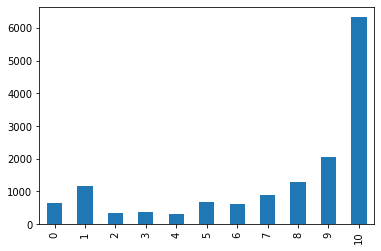

In [25]:
df.rating.value_counts().sort_index().plot.bar()

In [27]:
X_train, X_test, y_train, y_test = train_test_split(df.review, df.rating, random_state=7)

In [29]:
okt = Okt()

In [30]:
def tokenizer(text):
    target_tags = ['Noun', 'Verb', 'Adjective']
    result = []
    for word, tag in okt.pos(text, norm=True, stem=True):
        if tag in target_tags:
            result.append(word)
    return result

In [31]:
tfidf = TfidfVectorizer(tokenizer=tokenizer, max_features=2000, min_df=5, max_df=0.5)
X_train_tf = tfidf.fit_transform(X_train)
X_test_tf = tfidf.transform(X_test)

c:\Users\admin\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [45]:
lr = LinearRegression().fit(X_train_tf, y_train)
lr.score(X_train_tf, y_train), lr.score(X_test_tf, y_test)

(0.6045480190411427, 0.3950058696042389)

In [46]:
ridge = Ridge(alpha=1).fit(X_train_tf, y_train)
ridge.score(X_train_tf, y_train), ridge.score(X_test_tf, y_test)

(0.5862907287158476, 0.4572109496604907)

In [52]:
lasso = Lasso(alpha=0.00005).fit(X_train_tf, y_train)
lasso.score(X_train_tf, y_train), lasso.score(X_test_tf, y_test)

(0.601625662038255, 0.4226894278926733)

In [53]:
y_train_senti = (y_train > 5)
y_test_senti = (y_test > 5)

In [55]:
y_train_pred = (ridge.predict(X_train_tf) > 5)
y_test_pred = (ridge.predict(X_test_tf) > 5)

In [56]:
f1_score(y_train_senti, y_train_pred), f1_score(y_test_senti, y_test_pred)

(0.9241058776852009, 0.911660777385159)

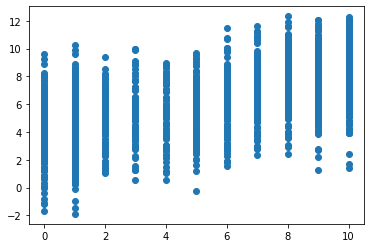

In [62]:
plt.scatter(y_test, ridge.predict(X_test_tf))

In [81]:
logreg = LogisticRegression(C=1, max_iter=1000).fit(X_train_tf, y_train_senti)
y_train_pred = logreg.predict(X_train_tf)
y_test_pred = logreg.predict(X_test_tf)

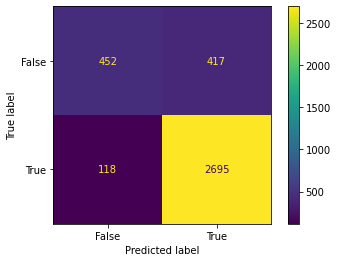

In [82]:
ConfusionMatrixDisplay.from_predictions(y_test_senti, y_test_pred)

In [83]:
f1_score(y_train_senti, y_train_pred), f1_score(y_test_senti, y_test_pred)

(0.9233560090702947, 0.909704641350211)